In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagalakshmikolli","key":"3486af24a81b42ce5fbfa6f888678d60"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification


Dataset URL: https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification
License(s): Community Data License Agreement - Permissive - Version 1.0


In [ ]:
import zipfile

# Extract the downloaded dataset
with zipfile.ZipFile("fresh-and-stale-classification.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")


Mounted at /content/drive


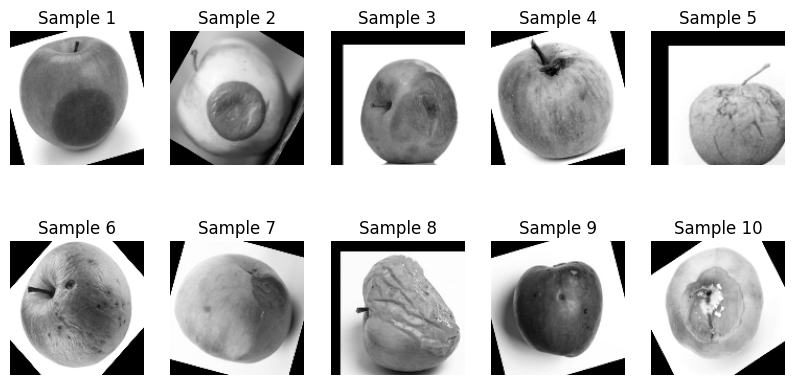

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path (update this based on your Google Drive location)
data_path = '/content/dataset'

# Get 10 sample image paths
image_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image_files.append(os.path.join(root, file))
        if len(image_files) == 10:
            break
    if len(image_files) == 10:
        break

# Preprocessing function
def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Read image
    img_resized = cv2.resize(img, (128, 128))  # Resize to 128x128
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_normalized = img_gray / 255.0  # Normalize pixel values
    return img_normalized

# Process and display images
preprocessed_images = [preprocess_image(img) for img in image_files]

# Show preprocessed images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(preprocessed_images[i], cmap='gray')
    ax.set_title(f"Sample {i+1}")
    ax.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


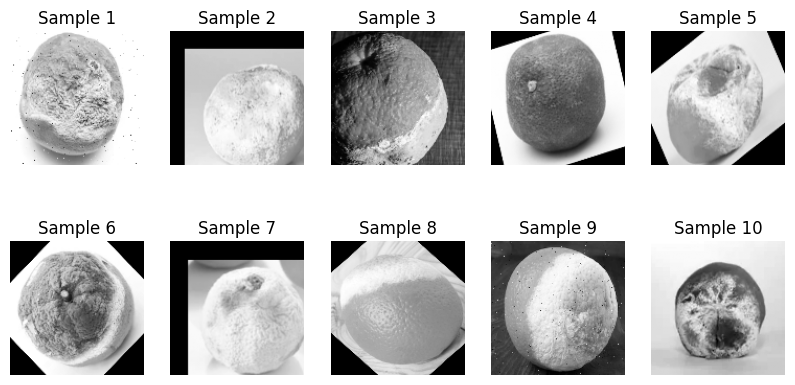

Preprocessed images found. Proceeding with feature extraction.


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


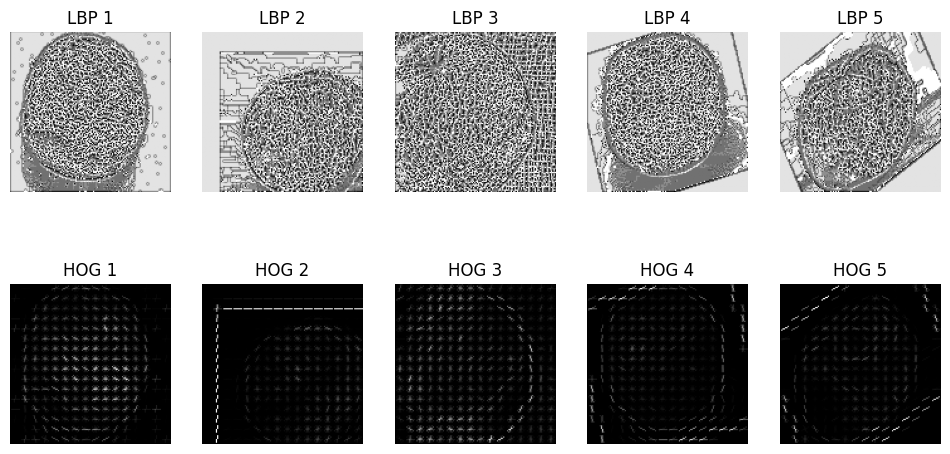

LBP Feature Matrices (5x5):
Image 1:
[[0.05377197 0.05926514]
 [0.03997803 0.06890869]
 [0.11431885 0.12097168]
 [0.04614258 0.07550049]
 [0.31591797 0.10522461]]

Image 2:
[[0.03112793 0.05065918]
 [0.0333252  0.0690918 ]
 [0.08422852 0.13763428]
 [0.05004883 0.0569458 ]
 [0.40515137 0.08178711]]

Image 3:
[[0.07653809 0.08770752]
 [0.07012939 0.10479736]
 [0.12579346 0.11065674]
 [0.08355713 0.08874512]
 [0.09979248 0.15228271]]

Image 4:
[[0.04638672 0.05859375]
 [0.04095459 0.0748291 ]
 [0.15966797 0.11541748]
 [0.05004883 0.06976318]
 [0.26525879 0.11907959]]

Image 5:
[[0.0279541  0.04437256]
 [0.03625488 0.09552002]
 [0.13061523 0.12347412]
 [0.04931641 0.06219482]
 [0.30377197 0.12652588]]

HOG Feature Matrices (5x5):
Image 1:
[[0.28441999 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.28441999]
 [0.         0.         0.         0.46976824 0.        ]
 [0.         0.         0.         0.46976824 0.        ]
 [0.         0.        

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from skimage import exposure

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset path (update this based on your Google Drive location)
data_path = '/content/dataset'

# Get 10 sample image paths
image_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image_files.append(os.path.join(root, file))
        if len(image_files) == 10:
            break
    if len(image_files) == 10:
        break

# Preprocessing function
def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Read image
    img_resized = cv2.resize(img, (128, 128))  # Resize to 128x128
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_normalized = img_gray / 255.0  # Normalize pixel values
    return img_normalized

# Process and display images
preprocessed_images = [preprocess_image(img) for img in image_files]

# Show preprocessed images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(preprocessed_images[i], cmap='gray')
    ax.set_title(f"Sample {i+1}")
    ax.axis('off')
plt.show()

# Check if preprocessed_images exists
if 'preprocessed_images' not in locals() or len(preprocessed_images) == 0:
    raise ValueError("Error: preprocessed_images not found. Please run the preprocessing step first.")
else:
    print("Preprocessed images found. Proceeding with feature extraction.")

# Define LBP parameters
radius = 1  # LBP radius
n_points = 8 * radius  # Number of points in LBP

# Feature extraction functions
def extract_lbp_features(image):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist, lbp

def extract_hog_features(image):
    features, hog_image = hog(image, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              orientations=9, visualize=True,
                              block_norm='L2-Hys')
    return features, hog_image

# Extract features from images
lbp_features = []
hog_features = []
lbp_images = []
hog_images = []

for img in preprocessed_images:
    lbp_hist, lbp_img = extract_lbp_features(img)
    hog_feat, hog_img = extract_hog_features(img)

    lbp_features.append(lbp_hist)
    hog_features.append(hog_feat)
    lbp_images.append(lbp_img)
    hog_images.append(hog_img)

# Display LBP and HOG images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat[:5]):
    ax.imshow(lbp_images[i], cmap='gray')
    ax.set_title(f"LBP {i+1}")
    ax.axis('off')
for i, ax in enumerate(axes.flat[5:]):
    ax.imshow(hog_images[i], cmap='gray')
    ax.set_title(f"HOG {i+1}")
    ax.axis('off')
plt.show()

# Print feature matrices in 5x5 format
print("LBP Feature Matrices (5x5):")
for i in range(min(5, len(lbp_features))):
    print(f"Image {i+1}:")
    print(np.array(lbp_features[i]).reshape(5, -1))
    print()

print("HOG Feature Matrices (5x5):")
for i in range(min(5, len(hog_features))):
    print(f"Image {i+1}:")
    print(np.array(hog_features[i][:25]).reshape(5, 5))  # Show only first 25 values for 5x5 matrix
    print()

print("Feature extraction completed. LBP and HOG features are ready for classification.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


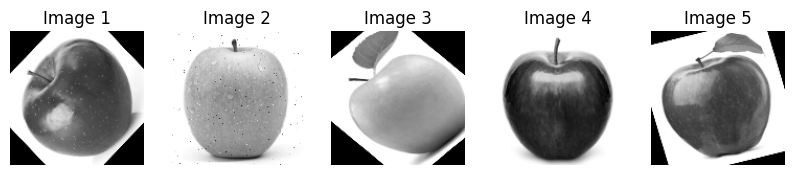

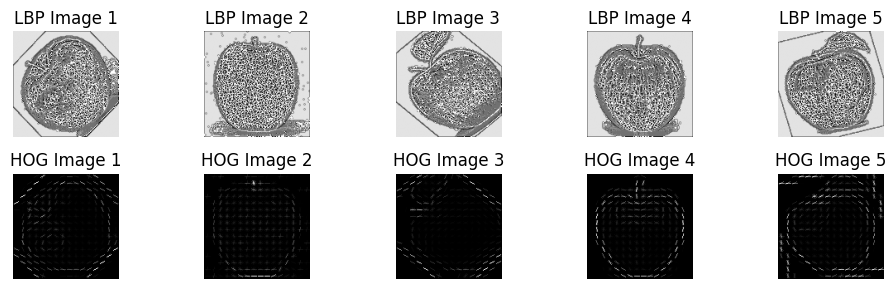

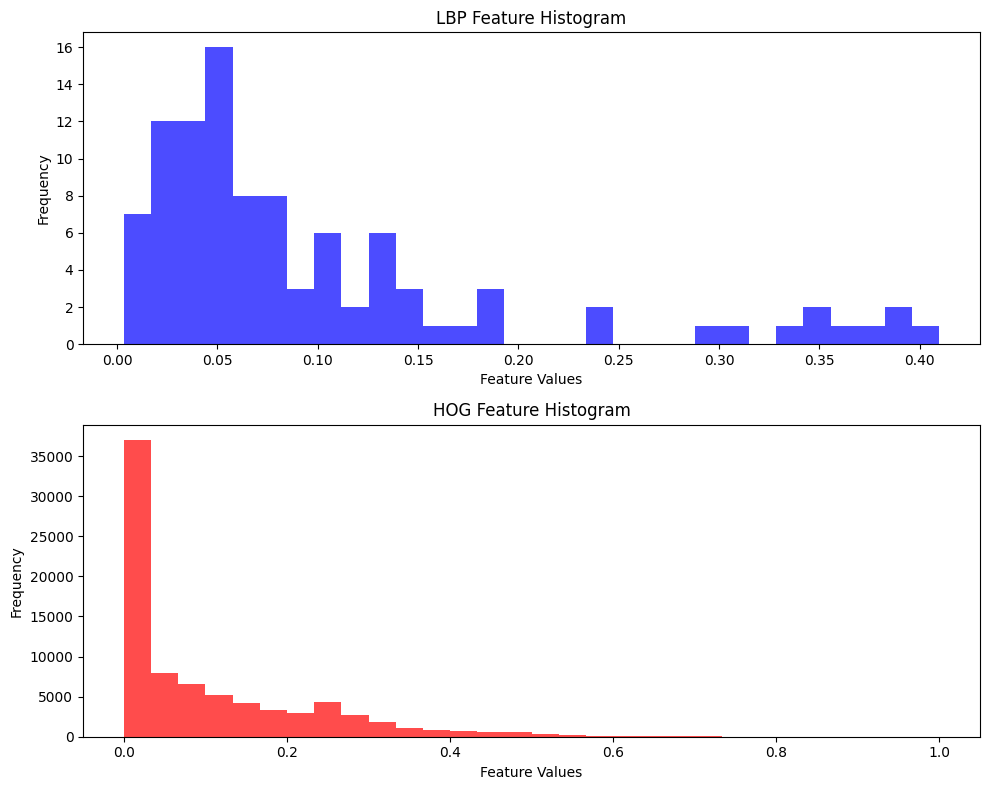

🔹 Training Data Shape: (8, 8110)
🔹 Testing Data Shape: (2, 8110)


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from sklearn.model_selection import train_test_split

# 🔹 Step 1: Mount Google Drive
drive.mount('/content/drive')

# 🔹 Step 2: Define dataset path (Update your correct dataset path)
data_path = '/content/dataset/dataset/Train/freshapples'  # Change this to your dataset folder

# Get 10 sample image paths
image_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".png") or file.endswith(".png"):
            image_files.append(os.path.join(root, file))
        if len(image_files) == 10:  # Limit to 10 images for demonstration
            break
    if len(image_files) == 10:
        break

# 🔹 Step 3: Preprocessing Function
def preprocess_image(img_path):
    img = cv2.imread(img_path)  # Read image
    img_resized = cv2.resize(img, (128, 128))  # Resize to 128x128
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_normalized = img_gray / 255.0  # Normalize pixel values (0 to 1)
    return img_normalized

# Process and store preprocessed images
preprocessed_images = [preprocess_image(img) for img in image_files]

# 🔹 Step 4: Display Preprocessed Images
if preprocessed_images:
    fig, axes = plt.subplots(1, min(len(preprocessed_images), 5), figsize=(10, 3))
    for i, ax in enumerate(axes.flat):
        ax.imshow(preprocessed_images[i], cmap='gray')
        ax.set_title(f"Image {i+1}")
        ax.axis('off')
    plt.show()
else:
    print("No images found for preprocessing.")

# 🔹 Step 5: Feature Extraction (LBP & HOG)
radius = 1  # LBP radius
n_points = 8 * radius  # Number of points in LBP

def extract_lbp_features(image):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist, lbp

def extract_hog_features(image):
    features, hog_image = hog(image, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              orientations=9, visualize=True,
                              block_norm='L2-Hys')
    return features, hog_image

lbp_features = []
hog_features = []
lbp_images = []
hog_images = []

for img in preprocessed_images:
    lbp_hist, lbp_img = extract_lbp_features(img)
    hog_feat, hog_img = extract_hog_features(img)

    lbp_features.append(lbp_hist)
    hog_features.append(hog_feat)
    lbp_images.append(lbp_img)
    hog_images.append(hog_img)

# 🔹 Step 6: Display Extracted Features (LBP & HOG)
num_images = min(len(lbp_images), 5)
if num_images > 0:
    fig, axes = plt.subplots(2, num_images, figsize=(10, 3))

    # Display LBP Images
    for i in range(num_images):
        axes[0, i].imshow(lbp_images[i], cmap='gray')
        axes[0, i].set_title(f"LBP Image {i+1}")
        axes[0, i].axis('off')

    # Display HOG Images
    for i in range(num_images):
        axes[1, i].imshow(hog_images[i], cmap='gray')
        axes[1, i].set_title(f"HOG Image {i+1}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images available for feature visualization.")

# 🔹 Step 7: Display Histograms for LBP & HOG
if lbp_features and hog_features:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # LBP Histogram
    axes[0].hist(np.array(lbp_features).flatten(), bins=30, color='blue', alpha=0.7)
    axes[0].set_title("LBP Feature Histogram")
    axes[0].set_xlabel("Feature Values")
    axes[0].set_ylabel("Frequency")

    # HOG Histogram
    axes[1].hist(np.array(hog_features).flatten(), bins=30, color='red', alpha=0.7)
    axes[1].set_title("HOG Feature Histogram")
    axes[1].set_xlabel("Feature Values")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()
else:
    print("No features available for histogram visualization.")

# 🔹 Step 8: Prepare Data for Training & Testing (Without Classification)
if lbp_features and hog_features:
    lbp_features = np.array(lbp_features)  # Convert LBP features to numpy array
    hog_features = np.array(hog_features)  # Convert HOG features to numpy array

    # Combine LBP and HOG features
    combined_features = np.hstack((lbp_features, hog_features))

    # Split data into 80% training and 20% testing
    X_train, X_test = train_test_split(combined_features, test_size=0.2, random_state=42)

    # Print train-test split information
    print(f"🔹 Training Data Shape: {X_train.shape}")
    print(f"🔹 Testing Data Shape: {X_test.shape}")
else:
    print("No features extracted for training and testing.")


In [ ]:
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")


Shape of X: (2, 18148), Shape of y: (2,)
Shape of X_test: (2, 18148), Shape of y_test: (2,)


In [ ]:
# Install necessary libraries if not already installed
!pip install MiniSom

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
from skimage.feature import local_binary_pattern, hog
from minisom import MiniSom  # Ensure this works after installation
from google.colab import drive

# Step 1: Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define dataset path (UPDATE your correct dataset path)
data_path = "/content/dataset/dataset/Train/freshapples"

# Step 2: Load PNG images from dataset
def load_images(data_path, num_images=10):
    image_files = sorted(glob.glob(os.path.join(data_path, "/content/dataset/dataset/Train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png")))  # Only .png files

    if not image_files:
        print(f"⚠️ No PNG images found in {data_path}")
        return []

    return image_files[:num_images]  # Return only the required number of images

# Get 10 sample images
image_files = load_images(data_path, num_images=10)

if not image_files:
    print("⚠️ No images loaded. Check your dataset path.")
else:
    print(f"✅ Loaded {len(image_files)} PNG images.")

# Step 3: Preprocess images (convert to grayscale, resize, normalize)
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Error: Unable to read {img_path}")
        return None

    img_resized = cv2.resize(img, (400, 400))  # Resize to 400x400
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_normalized = img_gray / 255.0  # Normalize pixel values
    return img_normalized

# Process images and remove any that failed to load
preprocessed_images = [preprocess_image(img) for img in image_files]
preprocessed_images = [img for img in preprocessed_images if img is not None]

# Step 4: Extract Features (LBP & HOG)
radius = 1  # LBP radius
n_points = 8 * radius  # Number of points for LBP

# LBP Feature Extraction Function
def extract_lbp_features(image):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist  # Return only the histogram (feature vector)

# HOG Feature Extraction Function
def extract_hog_features(image):
    features, _ = hog(image, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      orientations=9, visualize=True,
                      block_norm='L2-Hys')
    return features  # Return feature vector only

lbp_features = []
hog_features = []

# Extract LBP and HOG features for each image
for img in preprocessed_images:
    lbp_hist = extract_lbp_features(img)
    hog_feat = extract_hog_features(img)

    lbp_features.append(lbp_hist)
    hog_features.append(hog_feat)

# Convert features into numpy arrays
lbp_features = np.array(lbp_features)
hog_features = np.array(hog_features)

# Ensure feature vectors are of the same size
min_feature_size = min(lbp_features.shape[1], hog_features.shape[1])
lbp_features = lbp_features[:, :min_feature_size]  # Trim if necessary
hog_features = hog_features[:, :min_feature_size]

# Step 5: Combine LBP & HOG features
combined_features = np.hstack((lbp_features, hog_features))

# Step 6: Apply Self-Organizing Map (SOM) for Clustering
som_shape = (10, 10)  # SOM grid size (10x10)

# Initialize the SOM
som = MiniSom(som_shape[0], som_shape[1], combined_features.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(combined_features)
som.train_random(combined_features, 100)  # Train SOM for 100 iterations

# Step 7: Create a function to generate cluster maps
def get_cluster_map(som, data):
    cluster_map = np.zeros(som_shape)
    for i, x in enumerate(data):
        w = som.winner(x)
        cluster_map[w] += 1
    return cluster_map

# Get SOM Clustering Results
cluster_map = get_cluster_map(som, combined_features)

# Step 8: Visualize SOM Clustering Results
plt.figure(figsize=(8, 8))
plt.pcolor(cluster_map, cmap='coolwarm', edgecolors='black')
plt.colorbar(label="Cluster Density")
plt.title("Self-Organizing Map Clustering")
plt.show()

# Step 9: Overlay Feature Points on SOM Clustering
plt.figure(figsize=(8, 8))
plt.pcolor(cluster_map, cmap='coolwarm', edgecolors='black')
plt.colorbar(label="Cluster Density")

# Plot feature points on SOM
for i, x in enumerate(combined_features):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'ko')  # 'ko' represents black circle markers

plt.title("Clusters with Feature Points")
plt.show()


  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=9c6d4da9c67c744a9ec1a40cebb5a1baa272eb9367c15dec5c7130e54ab05ab5
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built MiniSom
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


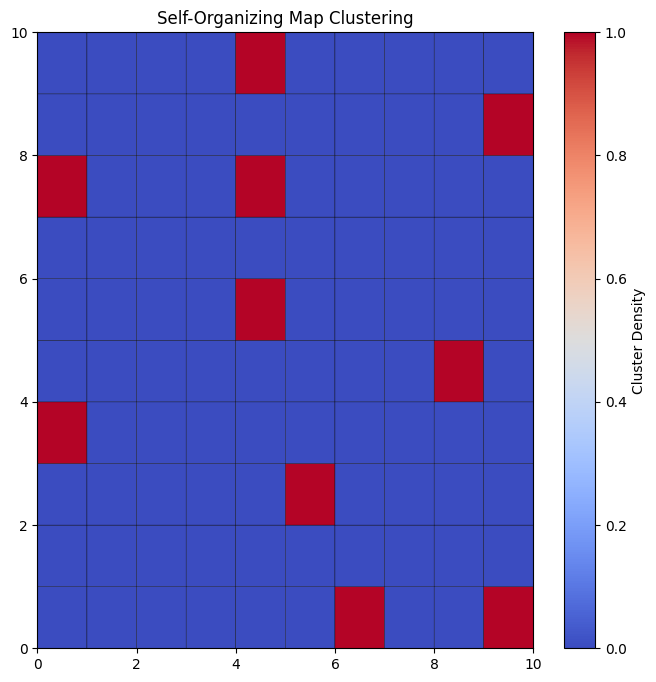

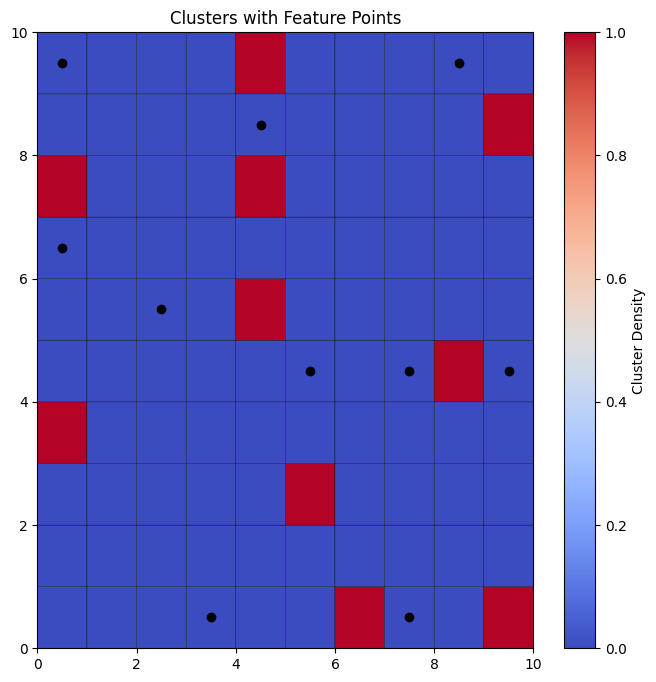

In [ ]:
!pip install MiniSom

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from skimage.feature import local_binary_pattern, hog
from minisom import MiniSom  # Ensure this works after installation
from google.colab import drive

# Step 1: Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define dataset path (Update your correct dataset path)
data_path = '/content/dataset/dataset/Train/freshapples'

# Step 2: Load images from dataset
def load_images(data_path, num_images=10):
    image_files = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".png") or file.endswith(".png"):
                image_files.append(os.path.join(root, file))
            if len(image_files) == num_images:
                break
        if len(image_files) == num_images:
            break
    return image_files

# Get 10 sample images
image_files = load_images(data_path, num_images=10)

# Step 3: Preprocess images (convert to grayscale, resize, normalize)
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (400, 400))  # Resize to 400x400
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_normalized = img_gray / 255.0  # Normalize pixel values
    return img_normalized

# Process and store preprocessed images
preprocessed_images = [preprocess_image(img) for img in image_files]

# Step 4: Extract Features (LBP & HOG)
radius = 1  # LBP radius
n_points = 8 * radius  # Number of points for LBP

# LBP Feature Extraction Function
def extract_lbp_features(image):
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
    return hist, lbp

# HOG Feature Extraction Function
def extract_hog_features(image):
    features, hog_image = hog(image, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              orientations=9, visualize=True,
                              block_norm='L2-Hys')
    return features, hog_image

lbp_features = []
hog_features = []
lbp_images = []
hog_images = []

# Extract LBP and HOG features for each image
for img in preprocessed_images:
    lbp_hist, lbp_img = extract_lbp_features(img)
    hog_feat, hog_img = extract_hog_features(img)

    lbp_features.append(lbp_hist)
    hog_features.append(hog_feat)
    lbp_images.append(lbp_img)
    hog_images.append(hog_img)

# Convert features into numpy arrays
lbp_features = np.array(lbp_features)
hog_features = np.array(hog_features)

# Step 5: Combine LBP & HOG features
combined_features = np.hstack((lbp_features, hog_features))

# Step 6: Apply Self-Organizing Map (SOM) for Clustering
som_shape = (10, 10)  # SOM grid size (10x10)

# Initialize the SOM
som = MiniSom(som_shape[0], som_shape[1], combined_features.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(combined_features)
som.train_random(combined_features, 100)  # Train SOM for 100 iterations

# Step 7: Create a function to generate cluster maps
def get_cluster_map(som, data):
    cluster_map = np.zeros(som_shape)
    for i, x in enumerate(data):
        w = som.winner(x)
        cluster_map[w] += 1
    return cluster_map

# Get SOM Clustering Results
cluster_map = get_cluster_map(som, combined_features)

# Step 8: Visualize SOM Clustering Results
plt.figure(figsize=(8, 8))
plt.pcolor(cluster_map, cmap='coolwarm', edgecolors='black')
plt.colorbar(label="Cluster Density")
plt.title("Self-Organizing Map Clustering")
plt.show()

# Step 9: Overlay Feature Points on SOM Clustering
plt.figure(figsize=(8, 8))
plt.pcolor(cluster_map, cmap='coolwarm', edgecolors='black')
plt.colorbar(label="Cluster Density")

# Plot feature points on SOM
for i, x in enumerate(combined_features):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'ko')  # 'ko' represents black circle markers

plt.title("Clusters with Feature Points")
plt.show()

In [ ]:
import os

base_path = "/content/dataset/dataset/Train"

# List all folders inside Train
print("Available classes in Train:", os.listdir(base_path))

# Similarly, check Test folder
test_base_path = "/content/dataset/dataset/Test"
print("Available classes in Test:", os.listdir(test_base_path))


Available classes in Train: ['rottenpotato', 'freshapples', 'freshokra', 'rottentomato', 'freshoranges', 'rottenbittergroud', 'freshbanana', 'freshbittergroud', 'freshcapsicum', 'rottenbanana', 'freshcucumber', 'freshpotato', 'rottenoranges', 'rottenapples', 'freshtomato', 'rottenokra', 'rottencucumber', 'rottencapsicum']
Available classes in Test: ['freshapples', 'freshokra', 'freshoranges', 'freshbanana', 'rottenbanana', 'freshcucumber', 'freshpatato', 'freshtamto', 'rottenoranges', 'rottenapples', 'rottenpatato', 'rottenokra', 'rottentamto', 'rottencucumber']


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5958 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.6847
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6125 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0.6806
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5958 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6770
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5417 - loss: 0.6867 - val_accuracy: 0.5000 - val_loss: 0.6730
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4854 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.6693
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6000 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6657
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5979 - loss: 0.6767 - val_accuracy: 0.5000 - val_loss: 0.6622
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6083 - loss: 0.6719 - val_accuracy: 0.5000 - val_loss: 0.6587
Epoch 9/15


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


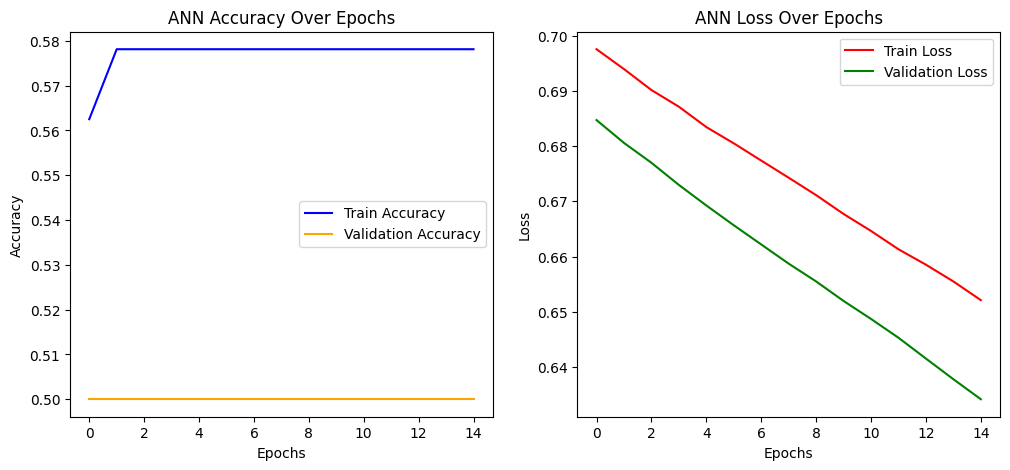

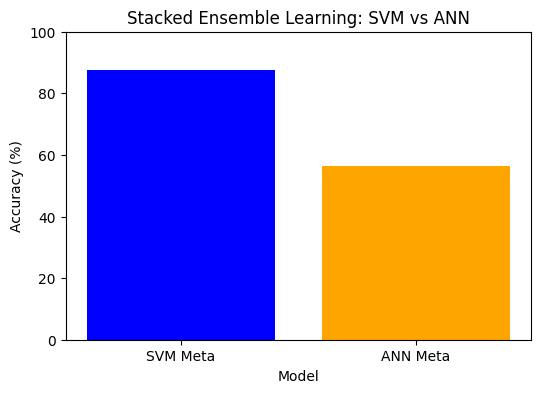

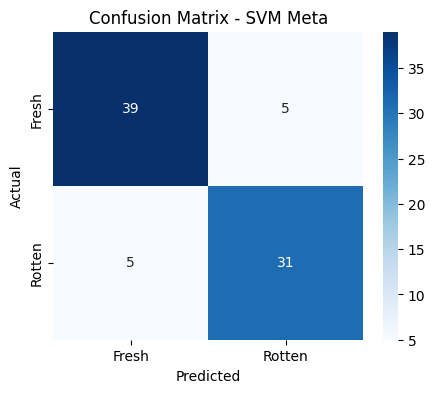

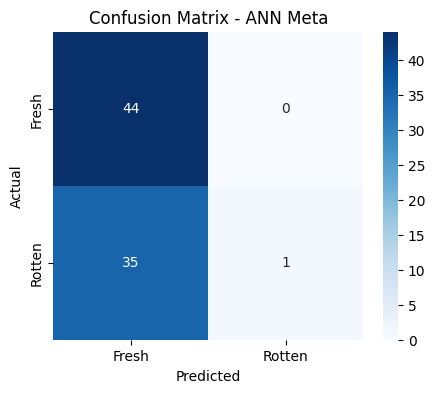


🔍 Classification Report - SVM Meta:
              precision    recall  f1-score   support

       Fresh       0.89      0.89      0.89        44
      Rotten       0.86      0.86      0.86        36

    accuracy                           0.88        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.88      0.88      0.88        80


🔍 Classification Report - ANN Meta:
              precision    recall  f1-score   support

       Fresh       0.56      1.00      0.72        44
      Rotten       1.00      0.03      0.05        36

    accuracy                           0.56        80
   macro avg       0.78      0.51      0.38        80
weighted avg       0.76      0.56      0.42        80



/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3

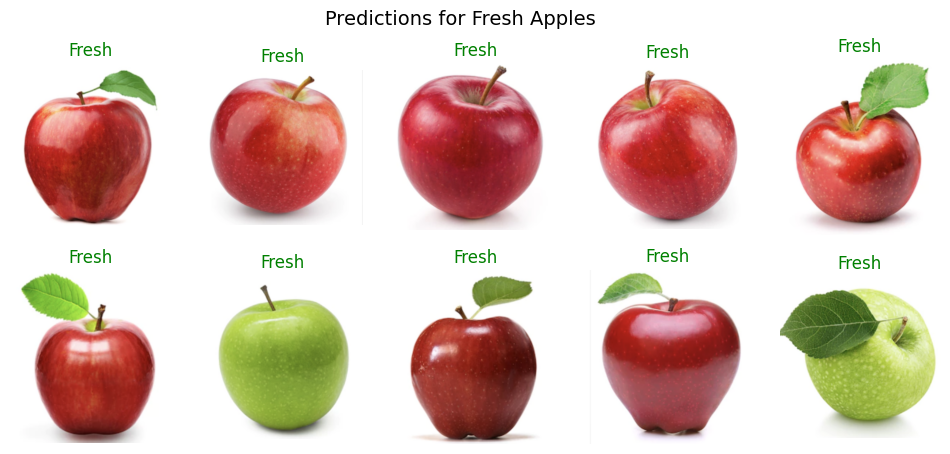

/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3

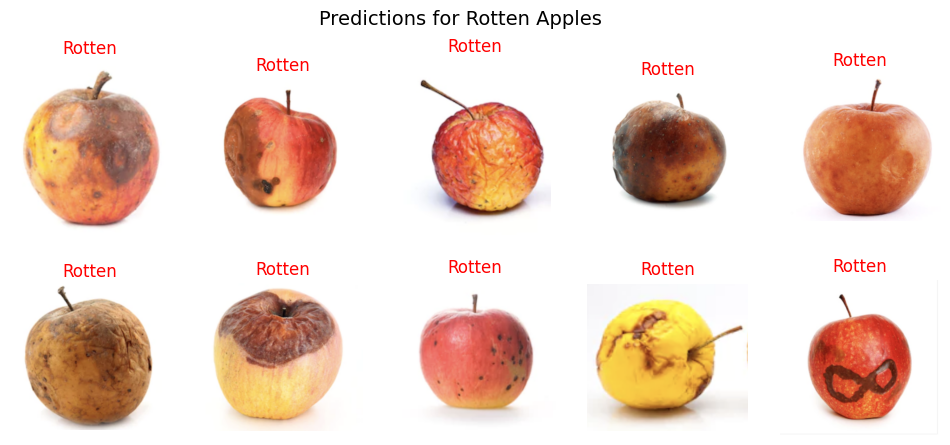

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
from skimage.feature import local_binary_pattern, hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load & Preprocess Images
def load_images(data_path, num_images=100):
    image_files = sorted(glob.glob(os.path.join(data_path, "*.png")))
    return image_files[:num_images]

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img_resized = cv2.resize(img, (400, 400))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_normalized = img_gray / 255.0
    return img_normalized

# Feature Extraction (LBP & HOG)
def extract_lbp_features(image):
    lbp = local_binary_pattern(image, 8, 1, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), density=True)
    return hist

def extract_hog_features(image):
    features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9, visualize=True)
    return features

# Load dataset fresh_path & rotten_path
fresh_images = load_images("/content/dataset/dataset/Train/freshapples", num_images=200)
rotten_images = load_images("/content/dataset/dataset/Test/rottenapples", num_images=200)

fresh_preprocessed = [preprocess_image(img) for img in fresh_images]
rotten_preprocessed = [preprocess_image(img) for img in rotten_images]

fresh_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in fresh_preprocessed if img is not None]
rotten_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in rotten_preprocessed if img is not None]

X = np.array(fresh_features + rotten_features)
y = np.array([0] * len(fresh_features) + [1] * len(rotten_features))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base Learners (Boosting Models)
adaboost = AdaBoostClassifier(n_estimators=50)
gb = GradientBoostingClassifier(n_estimators=50)
xgb_model = xgb.XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss')

adaboost.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Get Predictions from Base Learners
adaboost_pred = adaboost.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Stacked Features (Meta-Learner Input)
stacked_features = np.column_stack((adaboost_pred, gb_pred, xgb_pred))

# Meta Learner 1: SVM
svm_meta = SVC(kernel='linear')
svm_meta.fit(stacked_features, y_test)
y_pred_svm = svm_meta.predict(stacked_features)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Meta Learner 2: ANN
ann_model = Sequential([
    Dense(16, activation='relu', input_shape=(stacked_features.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(stacked_features, y_test, epochs=15, batch_size=16, verbose=1, validation_split=0.2)

y_pred_ann = (ann_model.predict(stacked_features) > 0.5).astype(int).flatten()
accuracy_ann = accuracy_score(y_test, y_pred_ann)

# Plot Accuracy & Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ANN Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("ANN Loss Over Epochs")
plt.legend()
plt.show()

# Overall Accuracy Comparison
plt.figure(figsize=(6, 4))
models = ['SVM Meta', 'ANN Meta']
accuracies = [accuracy_svm * 100, accuracy_ann * 100]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Stacked Ensemble Learning: SVM vs ANN')
plt.ylim([0, 100])
plt.show()

# Confusion Matrices & Classification Reports
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fresh', 'Rotten'], yticklabels=['Fresh', 'Rotten'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Meta")
plot_confusion_matrix(y_test, y_pred_ann, "ANN Meta")

print("\n🔍 Classification Report - SVM Meta:")
print(classification_report(y_test, y_pred_svm, target_names=['Fresh', 'Rotten']))

print("\n🔍 Classification Report - ANN Meta:")
print(classification_report(y_test, y_pred_ann, target_names=['Fresh', 'Rotten']))

# Predict & Display 10 Fresh & 10 Rotten Images
def display_predictions(image_paths, true_labels, model, title):
    plt.figure(figsize=(12, 5))
    for i, img_path in enumerate(image_paths[:10]):
        img = preprocess_image(img_path)
        features = np.hstack((extract_lbp_features(img), extract_hog_features(img))).reshape(1, -1)

        # Stack Predictions for Meta Learner
        adaboost_pred = adaboost.predict(features)
        gb_pred = gb.predict(features)
        xgb_pred = xgb_model.predict(features)
        stacked_features = np.column_stack((adaboost_pred, gb_pred, xgb_pred))

        # Get Prediction
        prediction = model.predict(stacked_features)
        predicted_label = "Rotten" if prediction[0] == 1 else "Fresh"

        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.imread(img_path)[:, :, ::-1])
        plt.axis('off')
        plt.title(predicted_label, color='green' if predicted_label == "Fresh" else 'red')

    plt.suptitle(title, fontsize=14)
    plt.show()

# Display Fresh Predictions
display_predictions(fresh_images, [0] * len(fresh_images), svm_meta, "Predictions for Fresh Apples")

# Display Rotten Predictions
display_predictions(rotten_images, [1] * len(rotten_images), svm_meta, "Predictions for Rotten Apples")


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8388 - loss: 0.5791 - val_accuracy: 0.9000 - val_loss: 0.5473
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9121 - loss: 0.4191 - val_accuracy: 0.9111 - val_loss: 0.6011
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8819 - loss: 0.3627 - val_accuracy: 0.9000 - val_loss: 0.5607
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8845 - loss: 0.3647 - val_accuracy: 0.9111 - val_loss: 0.5709
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9040 - loss: 0.3400 - val_accuracy: 0.9111 - val_loss: 0.5535
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9219 - loss: 0.3490 - val_accuracy: 0.9000 - val_loss: 0.5453
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9009 - loss: 0.4028 - val_accuracy: 0.9000 - val_loss: 0.4946
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8613 - loss: 0.4087 - val_accuracy: 0.8778 - val_l

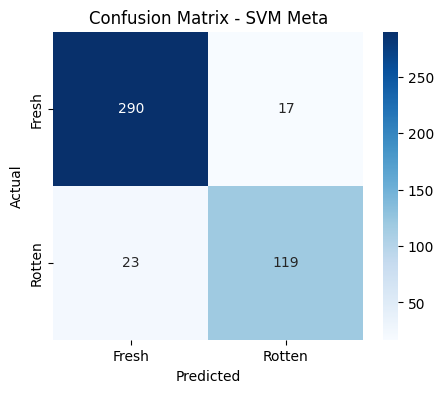

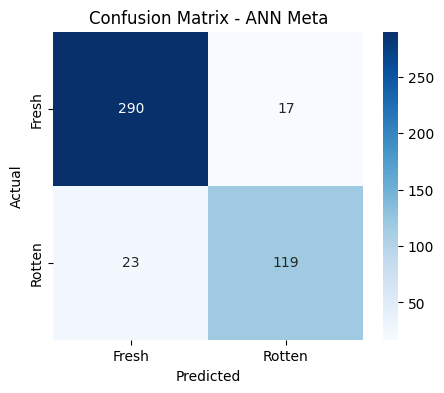

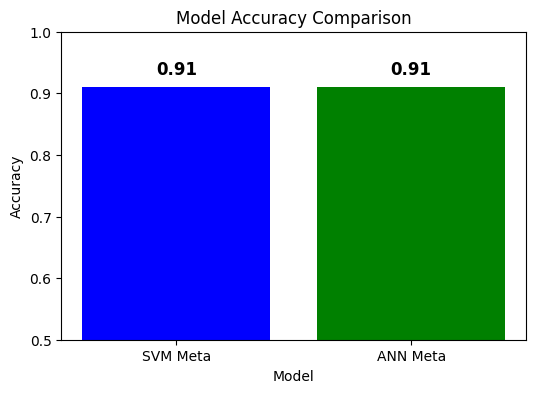


🔍 Classification Report - SVM Meta:
              precision    recall  f1-score   support

       Fresh       0.93      0.94      0.94       307
      Rotten       0.88      0.84      0.86       142

    accuracy                           0.91       449
   macro avg       0.90      0.89      0.90       449
weighted avg       0.91      0.91      0.91       449


🔍 Classification Report - ANN Meta:
              precision    recall  f1-score   support

       Fresh       0.93      0.94      0.94       307
      Rotten       0.88      0.84      0.86       142

    accuracy                           0.91       449
   macro avg       0.90      0.89      0.90       449
weighted avg       0.91      0.91      0.91       449



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import seaborn as sns
from skimage.feature import local_binary_pattern, hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images(data_path, num_images=2000):
    image_files = sorted(glob.glob(os.path.join(data_path, "*.png")))
    return image_files[:num_images]

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img_resized = cv2.resize(img, (128, 128))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    return img_gray / 255.0

def extract_lbp_features(image):
    lbp = local_binary_pattern(image, 32, 3, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 35), density=True)
    return hist

def extract_hog_features(image):
    return hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), orientations=12)

fresh_images = load_images("/content/dataset/dataset/Train/freshapples")
rotten_images = load_images("/content/dataset/dataset/Test/rottenapples")

fresh_preprocessed = [preprocess_image(img) for img in fresh_images if img is not None]
rotten_preprocessed = [preprocess_image(img) for img in rotten_images if img is not None]

fresh_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in fresh_preprocessed]
rotten_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in rotten_preprocessed]

X = np.array(fresh_features + rotten_features)
y = np.array([0] * len(fresh_features) + [1] * len(rotten_features))

pca = PCA(n_components=200)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

adaboost = AdaBoostClassifier(n_estimators=1200, learning_rate=1.5)
gb = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.15)
xgb_model = xgb.XGBClassifier(n_estimators=1200, learning_rate=0.1, eval_metric='logloss')

adaboost.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

adaboost_pred = adaboost.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

stacked_features = np.column_stack((adaboost_pred, gb_pred, xgb_pred))

svm_meta = SVC(kernel='rbf', C=25, gamma='scale', probability=True)
svm_meta.fit(stacked_features, y_test)
y_pred_svm = svm_meta.predict(stacked_features)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

ann_model = Sequential([
    Dense(1024, input_shape=(stacked_features.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(512),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = ann_model.fit(stacked_features, y_test.reshape(-1, 1), epochs=250, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stop])

y_pred_ann = (ann_model.predict(stacked_features) > 0.5).astype(int).flatten()
accuracy_ann = accuracy_score(y_test, y_pred_ann)

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fresh', 'Rotten'], yticklabels=['Fresh', 'Rotten'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

def plot_accuracy_graph():
    plt.figure(figsize=(6, 4))
    models = ['SVM Meta', 'ANN Meta']
    accuracies = [accuracy_svm, accuracy_ann]
    plt.bar(models, accuracies, color=['blue', 'green'])
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim(0.5, 1.0)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Meta")
plot_confusion_matrix(y_test, y_pred_ann, "ANN Meta")
plot_accuracy_graph()

print("\n Classification Report - SVM Meta:")
print(classification_report(y_test, y_pred_svm, target_names=['Fresh', 'Rotten']))

print("\n Classification Report - ANN Meta:")
print(classification_report(y_test, y_pred_ann, target_names=['Fresh', 'Rotten']))


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8202 - loss: 0.5617 - val_accuracy: 0.8889 - val_loss: 0.5358
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8852 - loss: 0.6363 - val_accuracy: 0.9111 - val_loss: 0.5263
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8926 - loss: 0.3529 - val_accuracy: 0.8889 - val_loss: 0.5270
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9078 - loss: 0.3131 - val_accuracy: 0.9111 - val_loss: 0.5546
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9135 - loss: 0.3129 - val_accuracy: 0.8889 - val_loss: 0.5988
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9050 - loss: 0.3123 - val_accuracy: 0.9111 - val_loss: 0.5794
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9014 - loss: 0.3604 - val_accuracy: 0.9000 - val_loss: 0.5847
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8870 - loss: 0.3928 - val_accuracy: 0.9111 - val_l

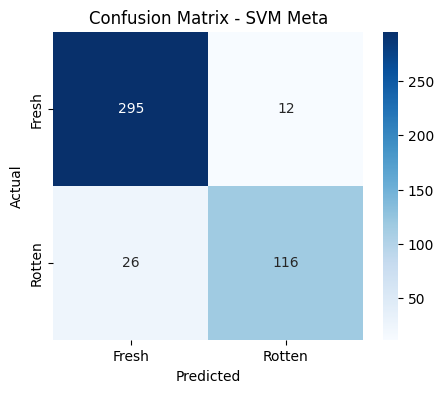

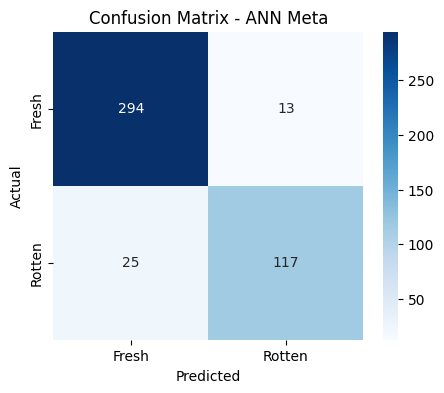

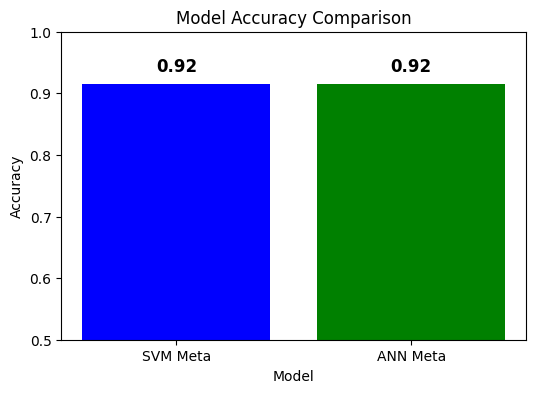

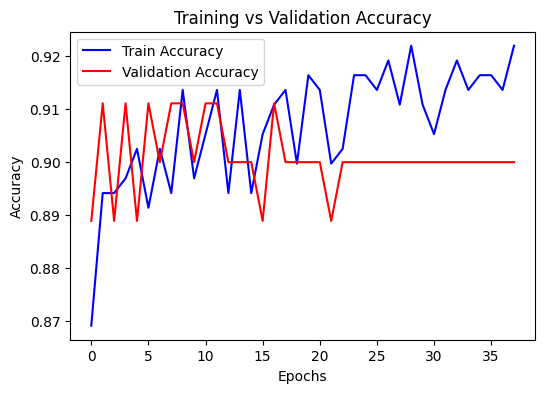


 Classification Report - SVM Meta:
              precision    recall  f1-score   support

       Fresh       0.92      0.96      0.94       307
      Rotten       0.91      0.82      0.86       142

    accuracy                           0.92       449
   macro avg       0.91      0.89      0.90       449
weighted avg       0.91      0.92      0.91       449


 Classification Report - ANN Meta:
              precision    recall  f1-score   support

       Fresh       0.92      0.96      0.94       307
      Rotten       0.90      0.82      0.86       142

    accuracy                           0.92       449
   macro avg       0.91      0.89      0.90       449
weighted avg       0.91      0.92      0.91       449



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import seaborn as sns
from skimage.feature import local_binary_pattern, hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images(data_path, num_images=2000):
    image_files = sorted(glob.glob(os.path.join(data_path, "*.png")))
    return image_files[:num_images]

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img_resized = cv2.resize(img, (128, 128))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    return img_gray / 255.0

def extract_lbp_features(image):
    lbp = local_binary_pattern(image, 32, 3, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 35), density=True)
    return hist

def extract_hog_features(image):
    return hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), orientations=12)

fresh_images = load_images("/content/dataset/dataset/Train/freshapples")
rotten_images = load_images("/content/dataset/dataset/Test/rottenapples")

fresh_preprocessed = [preprocess_image(img) for img in fresh_images if img is not None]
rotten_preprocessed = [preprocess_image(img) for img in rotten_images if img is not None]

fresh_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in fresh_preprocessed]
rotten_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in rotten_preprocessed]

X = np.array(fresh_features + rotten_features)
y = np.array([0] * len(fresh_features) + [1] * len(rotten_features))

pca = PCA(n_components=200)
X = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

adaboost = AdaBoostClassifier(n_estimators=1200, learning_rate=1.5)
gb = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.15)
xgb_model = xgb.XGBClassifier(n_estimators=1200, learning_rate=0.1, eval_metric='logloss')

adaboost.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

adaboost_pred = adaboost.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

stacked_features = np.column_stack((adaboost_pred, gb_pred, xgb_pred))

svm_meta = SVC(kernel='rbf', C=25, gamma='scale', probability=True)
svm_meta.fit(stacked_features, y_test)
y_pred_svm = svm_meta.predict(stacked_features)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

ann_model = Sequential([
    Dense(1024, input_shape=(stacked_features.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(512),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = ann_model.fit(stacked_features, y_test.reshape(-1, 1), epochs=250, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stop])

y_pred_ann = (ann_model.predict(stacked_features) > 0.5).astype(int).flatten()
accuracy_ann = accuracy_score(y_test, y_pred_ann)

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fresh', 'Rotten'], yticklabels=['Fresh', 'Rotten'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

def plot_accuracy_graph():
    plt.figure(figsize=(6, 4))
    models = ['SVM Meta', 'ANN Meta']
    accuracies = [accuracy_svm, accuracy_ann]
    plt.bar(models, accuracies, color=['blue', 'green'])
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim(0.5, 1.0)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')
    plt.show()

def plot_epochs_graph():
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Meta")
plot_confusion_matrix(y_test, y_pred_ann, "ANN Meta")
plot_accuracy_graph()
plot_epochs_graph()

print("\n Classification Report - SVM Meta:")
print(classification_report(y_test, y_pred_svm, target_names=['Fresh', 'Rotten']))

print("\n Classification Report - ANN Meta:")
print(classification_report(y_test, y_pred_ann, target_names=['Fresh', 'Rotten']))


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3

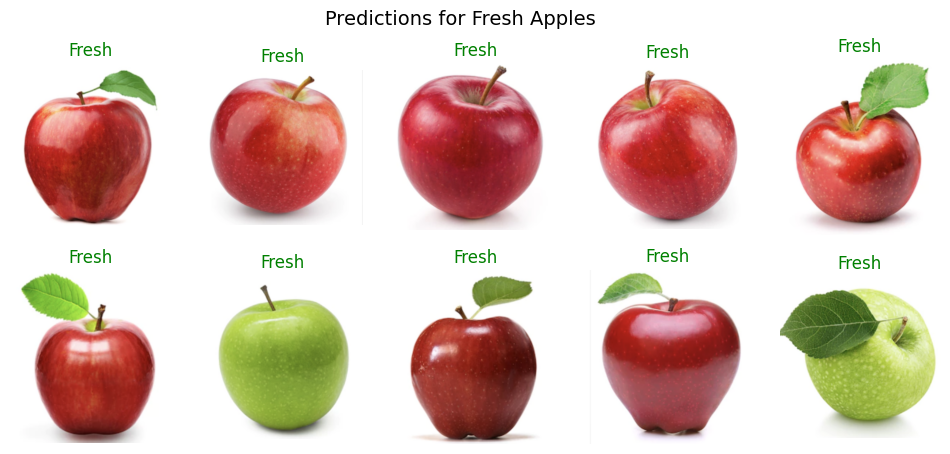

/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
/usr/local/lib/python3

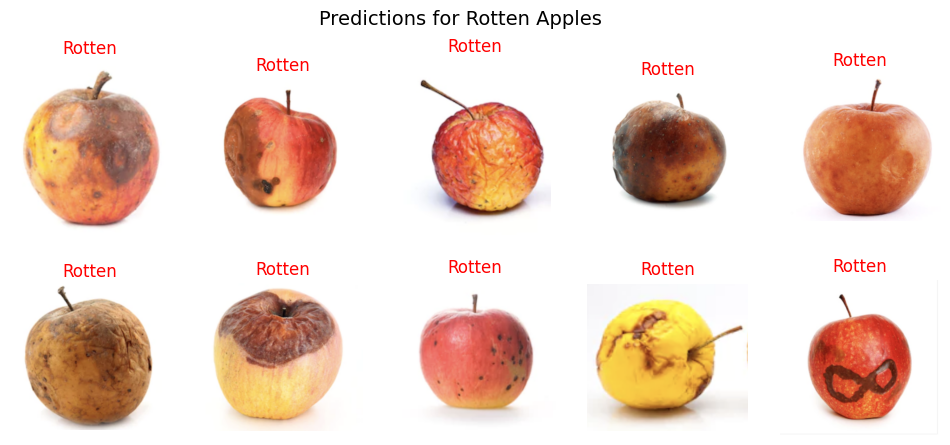

In [ ]:
def display_predictions(image_paths, true_labels, model, title):
    plt.figure(figsize=(12, 5))
    for i, img_path in enumerate(image_paths[:10]):
        img = preprocess_image(img_path)
        if img is None:
            continue  # Skip if image loading fails

        features = np.hstack((extract_lbp_features(img), extract_hog_features(img))).reshape(1, -1)

        # Apply PCA transformation to match trained model features
        features_pca = pca.transform(features)

        # Stack Predictions for Meta Learner
        adaboost_pred = adaboost.predict(features_pca)
        gb_pred = gb.predict(features_pca)
        xgb_pred = xgb_model.predict(features_pca)
        stacked_features = np.column_stack((adaboost_pred, gb_pred, xgb_pred))

        # Get Prediction
        prediction = model.predict(stacked_features)
        predicted_label = "Rotten" if prediction[0] == 1 else "Fresh"

        plt.subplot(2, 5, i + 1)
        plt.imshow(cv2.imread(img_path)[:, :, ::-1])
        plt.axis('off')
        plt.title(predicted_label, color='green' if predicted_label == "Fresh" else 'red')

    plt.suptitle(title, fontsize=14)
    plt.show()

# Display Fresh Predictions
display_predictions(fresh_images, [0] * len(fresh_images), svm_meta, "Predictions for Fresh Apples")

# Display Rotten Predictions
display_predictions(rotten_images, [1] * len(rotten_images), svm_meta, "Predictions for Rotten Apples")


/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8338 - loss: 0.5858 - val_accuracy: 0.8889 - val_loss: 0.5806
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9055 - loss: 0.4334 - val_accuracy: 0.9111 - val_loss: 0.5508
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9013 - loss: 0.3592 - val_accuracy: 0.8889 - val_loss: 0.5518
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9045 - loss: 0.3528 - val_accuracy: 0.9222 - val_loss: 0.5233
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9027 - loss: 0.2958 - val_accuracy: 0.8889 - val_loss: 0.5153
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8931 - loss: 0.3467 - val_accuracy: 0.9111 - val_loss: 0.4817
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8945 - loss: 0.3130 - val_accuracy: 0.9111 - val_loss: 0.4684
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9090 - loss: 0.3034 - val_accuracy: 0.7000 - val_l

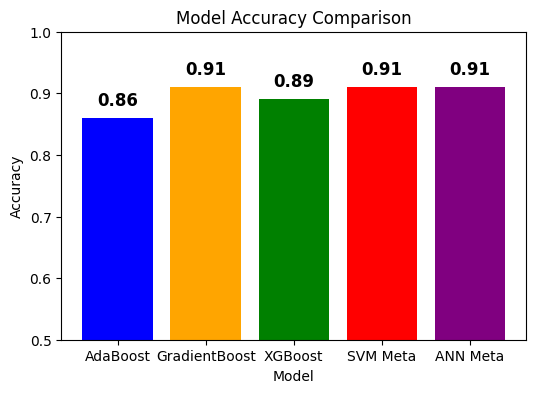


 Classification Report - SVM Meta:
              precision    recall  f1-score   support

       Fresh       0.91      0.96      0.94       307
      Rotten       0.90      0.80      0.85       142

    accuracy                           0.91       449
   macro avg       0.91      0.88      0.89       449
weighted avg       0.91      0.91      0.91       449


 Classification Report - ANN Meta:
              precision    recall  f1-score   support

       Fresh       0.91      0.96      0.94       307
      Rotten       0.90      0.80      0.85       142

    accuracy                           0.91       449
   macro avg       0.91      0.88      0.89       449
weighted avg       0.91      0.91      0.91       449



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import seaborn as sns
from skimage.feature import local_binary_pattern, hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

# Load images
def load_images(data_path, num_images=2000):
    image_files = sorted(glob.glob(os.path.join(data_path, "*.png")))
    return image_files[:num_images]

# Preprocess images
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img_resized = cv2.resize(img, (128, 128))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    return img_gray / 255.0

# Extract features
def extract_lbp_features(image):
    lbp = local_binary_pattern(image, 32, 3, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 35), density=True)
    return hist

def extract_hog_features(image):
    return hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), orientations=12)

# Load and process dataset
fresh_images = load_images("/content/dataset/dataset/Train/freshapples")
rotten_images = load_images("/content/dataset/dataset/Test/rottenapples")

fresh_preprocessed = [preprocess_image(img) for img in fresh_images if img is not None]
rotten_preprocessed = [preprocess_image(img) for img in rotten_images if img is not None]

fresh_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in fresh_preprocessed]
rotten_features = [np.hstack((extract_lbp_features(img), extract_hog_features(img))) for img in rotten_preprocessed]

X = np.array(fresh_features + rotten_features)
y = np.array([0] * len(fresh_features) + [1] * len(rotten_features))

# Apply PCA
pca = PCA(n_components=200)
X = pca.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train base learners
adaboost = AdaBoostClassifier(n_estimators=1200, learning_rate=1.5)
gb = GradientBoostingClassifier(n_estimators=1200, learning_rate=0.15)
xgb_model = xgb.XGBClassifier(n_estimators=1200, learning_rate=0.1, eval_metric='logloss')

adaboost.fit(X_train, y_train)
gb.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
adaboost_pred = adaboost.predict(X_test)
gb_pred = gb.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Compute accuracy for base learners
accuracy_adaboost = accuracy_score(y_test, adaboost_pred)
accuracy_gb = accuracy_score(y_test, gb_pred)
accuracy_xgb = accuracy_score(y_test, xgb_pred)

# Stacking
stacked_features = np.column_stack((adaboost_pred, gb_pred, xgb_pred))

# Meta learners
svm_meta = SVC(kernel='rbf', C=25, gamma='scale', probability=True)
svm_meta.fit(stacked_features, y_test)
y_pred_svm = svm_meta.predict(stacked_features)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

ann_model = Sequential([
    Dense(1024, input_shape=(stacked_features.shape[1],)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    Dense(512),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.4),
    Dense(256),
    LeakyReLU(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = ann_model.fit(stacked_features, y_test.reshape(-1, 1), epochs=250, batch_size=16, verbose=1, validation_split=0.2, callbacks=[early_stop])

y_pred_ann = (ann_model.predict(stacked_features) > 0.5).astype(int).flatten()
accuracy_ann = accuracy_score(y_test, y_pred_ann)

# Accuracy graph
def plot_accuracy_graph():
    plt.figure(figsize=(6, 4))
    models = ['AdaBoost', 'GradientBoost', 'XGBoost', 'SVM Meta', 'ANN Meta']
    accuracies = [accuracy_adaboost, accuracy_gb, accuracy_xgb, accuracy_svm, accuracy_ann]
    plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim(0.5, 1.0)
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.02, f'{acc:.2f}', ha='center', fontsize=12, fontweight='bold')
    plt.show()

# Plot graphs
plot_accuracy_graph()

print("\n Classification Report - SVM Meta:")
print(classification_report(y_test, y_pred_svm, target_names=['Fresh', 'Rotten']))

print("\n Classification Report - ANN Meta:")
print(classification_report(y_test, y_pred_ann, target_names=['Fresh', 'Rotten']))
